<a href="https://colab.research.google.com/github/4rc4ng3l/Skyline-Math-200/blob/main/!!!!_Copy_of_Python_Notebook_Setup_by_Arcangel_Sagum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp

In [108]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


**Research Question # 1 : Is there an association between the amount of time on 
active duty and the time you sleep?**


Codebook 1: On those days, what time do you usually go to sleep the night or day before? **Hours**

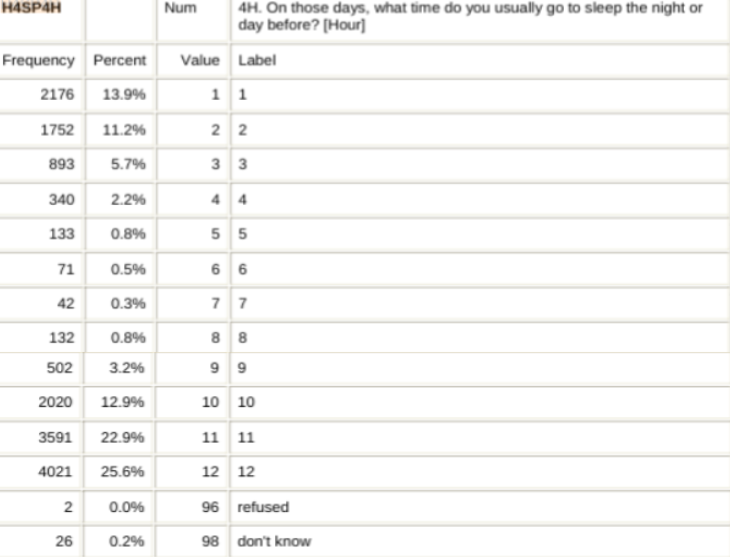

Codebook 2: On those days, what time do you usually go to sleep the night or day before? **Minutes**

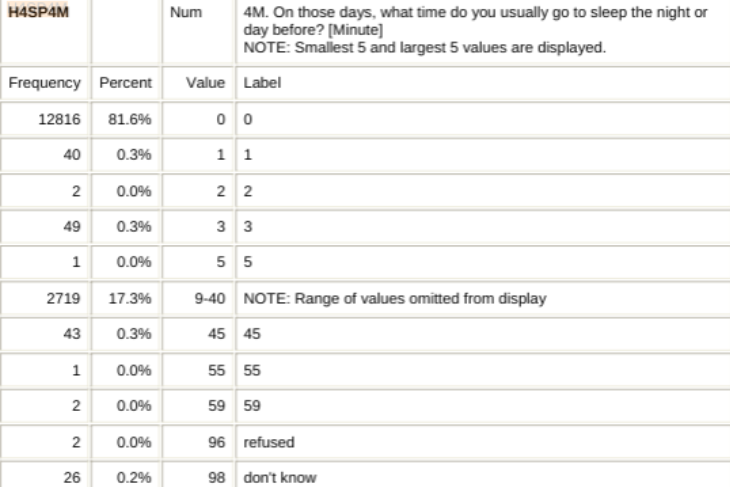

Codebook 3: On those days, what time do you usually go to sleep the night or day before? **am/pm**

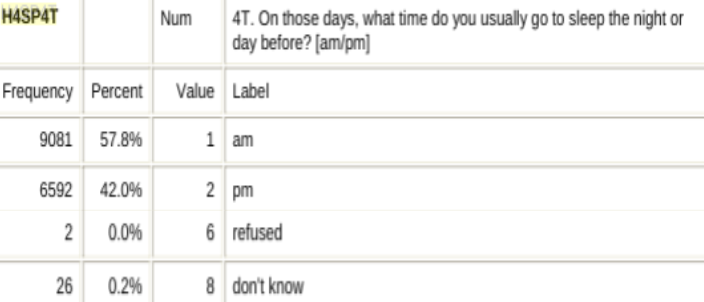

In [80]:
#Manage data for variable 1
df['H4SP4H'].dtype

dtype('O')

In [81]:
df['hours'] = df['H4SP4H']
df['hours'] = pd.to_numeric( df['hours'] , errors= 'coerce')
df['hours'] = df['hours'].loc[ df['hours'] !=' ' ]
df['hours'] = df['hours'].loc[ df['hours'] < 96 ]
df['hours'].max()

12.0

In [82]:
df['minutes'] = df['H4SP4M']
df['minutes'] = pd.to_numeric( df['minutes'] , errors= 'coerce')
df['minutes'] = df['minutes'].loc[ df['minutes'] !=' ' ]
df['minutes'] = df['minutes'].loc[ df['minutes'] < 96 ]
df['minutes'].max()

45.0

In [83]:
df['time'] = df['H4SP4T']
df['time'] = df['time'].loc[ df['time'] !=' ' ]
df['time'] = df['time'].loc[ df['time'] !='6' ]
df['time'] = df['time'].loc[ df['time'] !='8' ]
df['time'].replace(['1','2'],['AM','PM'],inplace=True)
df['time'].value_counts()

AM    2942
PM    2164
Name: time, dtype: int64

In [84]:
df_time_convert= df[['time','minutes','hours']]

In [85]:
df_time_convert.dropna(inplace=True)

<ipython-input-85-9f90cf800d75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert.dropna(inplace=True)


In [86]:
df_time_convert

,time,minutes,hours
1,AM,0.0,1.0
3,AM,0.0,4.0
7,PM,30.0,11.0
9,AM,0.0,2.0
11,AM,0.0,1.0
...,...,...,...
6499,AM,0.0,2.0
6500,AM,0.0,1.0
6501,AM,0.0,1.0
6502,AM,1.0,12.0


In [87]:
def to_military_time_float(in_hour,in_min,am_pm):
  out_time = 0
  if in_hour == '12':

    if am_pm == 'AM': 
      out_time = 0
    else:
      out_time = int(in_hour)
  
  elif (0 < int(in_hour) < 12):
    if am_pm == 'AM':
      out_time = int(in_hour)
    else:
      out_time = int(in_hour) + 12
  
  

  out_min = int(in_min) / 60

  out_time += out_min 




  return out_time

In [88]:
df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['hours'],x['minutes'],x['time']),axis = 1)
df_time_convert

<ipython-input-88-43a454b06df1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['hours'],x['minutes'],x['time']),axis = 1)


,time,minutes,hours,Time Value (float)
1,AM,0.0,1.0,1.000000
3,AM,0.0,4.0,4.000000
7,PM,30.0,11.0,23.500000
9,AM,0.0,2.0,2.000000
11,AM,0.0,1.0,1.000000
...,...,...,...,...
6499,AM,0.0,2.0,2.000000
6500,AM,0.0,1.0,1.000000
6501,AM,0.0,1.0,1.000000
6502,AM,1.0,12.0,0.016667


In [89]:
df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['hours'],x['minutes'],x['time']),axis = 1)
df_time_convert

<ipython-input-89-43a454b06df1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['hours'],x['minutes'],x['time']),axis = 1)


,time,minutes,hours,Time Value (float)
1,AM,0.0,1.0,1.000000
3,AM,0.0,4.0,4.000000
7,PM,30.0,11.0,23.500000
9,AM,0.0,2.0,2.000000
11,AM,0.0,1.0,1.000000
...,...,...,...,...
6499,AM,0.0,2.0,2.000000
6500,AM,0.0,1.0,1.000000
6501,AM,0.0,1.0,1.000000
6502,AM,1.0,12.0,0.016667


In [96]:
df= df.assign(sleep_time=df_time_convert['Time Value (float)'])

In [97]:
df_time_convert.loc[df_time_convert['Time Value (float)'] > 24]

,time,minutes,hours,Time Value (float)


In [114]:
#Manage data for variable 2
df['AM/PM'] = df['H4SP4T']
df['AM/PM'] = df['AM/PM'].loc[ df['AM/PM'] !=' ' ]
df['AM/PM'] = df['AM/PM'].loc[ df['AM/PM'] !='6' ]
df['AM/PM'] = df['AM/PM'].loc[ df['AM/PM'] !='8' ]
df['AM/PM'].replace(['1','2'],['AM','PM'],inplace=True)
df['AM/PM'].value_counts()

AM    2942
PM    2164
Name: AM/PM, dtype: int64

In [99]:
#Graphs and tables or statistics
df['sleep_time'].describe()

count    5106.000000
mean        9.861888
std        10.416615
min         0.000000
25%         0.500000
50%         3.000000
75%        22.500000
max        23.750000
Name: sleep_time, dtype: float64

<Axes: xlabel='sleep_time', ylabel='Count'>

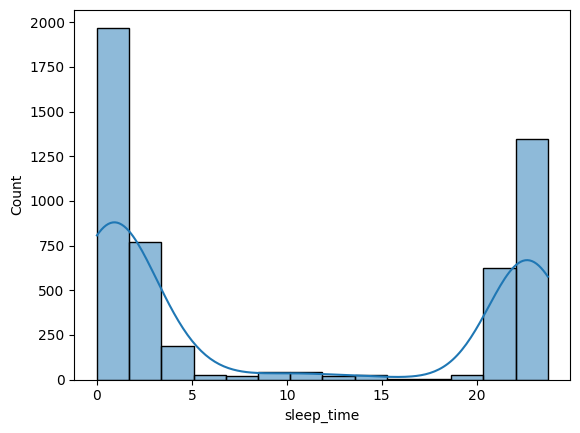

In [54]:
sns.histplot(df['sleep_time'], kde= True)

<Axes: xlabel='sleep_time'>

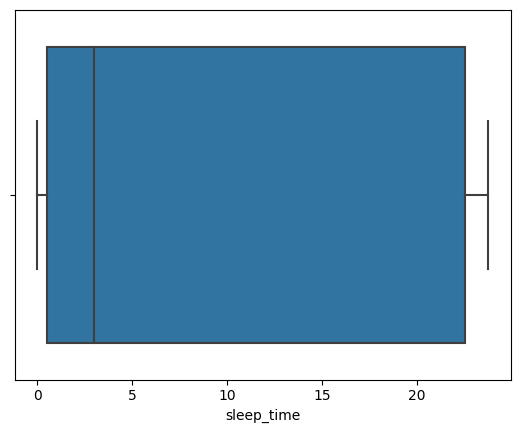

In [55]:
sns.boxplot(x = 'sleep_time', data =df)

<Axes: title={'center': 'On those days, what time do you usually go to sleep the night or day before? (AM or PM)'}, ylabel='AM/PM'>

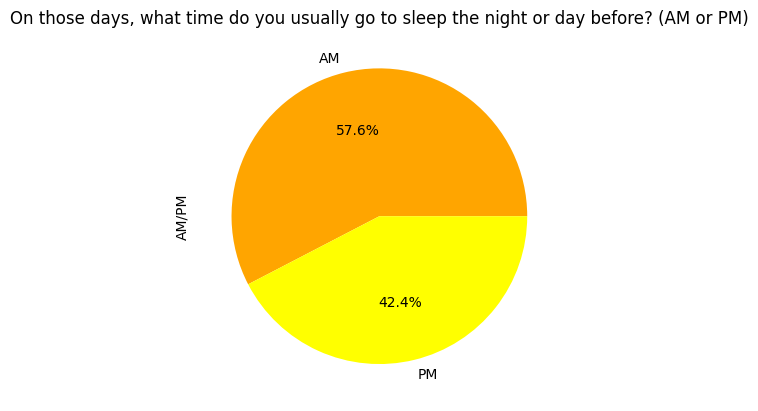

In [110]:
plt.title("On those days, what time do you usually go to sleep the night or day before? (AM or PM)")
df['AM/PM'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=['orange', 'yellow', 'red', 'yellow','blue','purple'])

<Axes: title={'center': 'On those days, what time do you usually go to sleep the night or day before? (AM or PM)'}, xlabel='Time Of Day', ylabel='Person Count'>

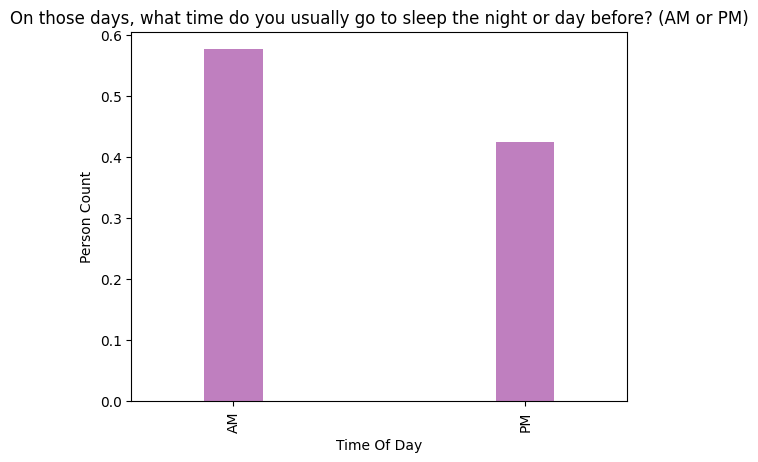

In [138]:
plt.xlabel("Time Of Day")
plt.ylabel("Person Count")
plt.title("On those days, what time do you usually go to sleep the night or day before? (AM or PM)")
df['AM/PM'].value_counts(normalize = True).plot(kind ='bar', color = 'purple', width = 0.2, alpha = 0.5)

Codebook 4: What is the total amount of time you (have) served on active duty? **Years**

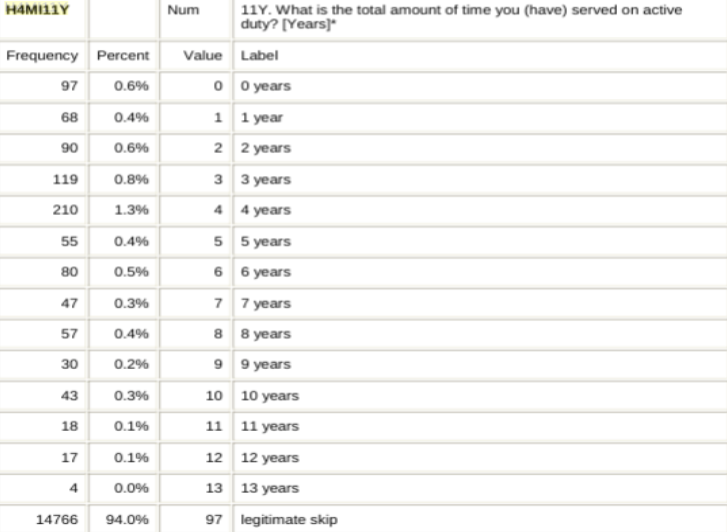

Codebook 5: What is the total amount of time you (have) served on active duty? **Months**

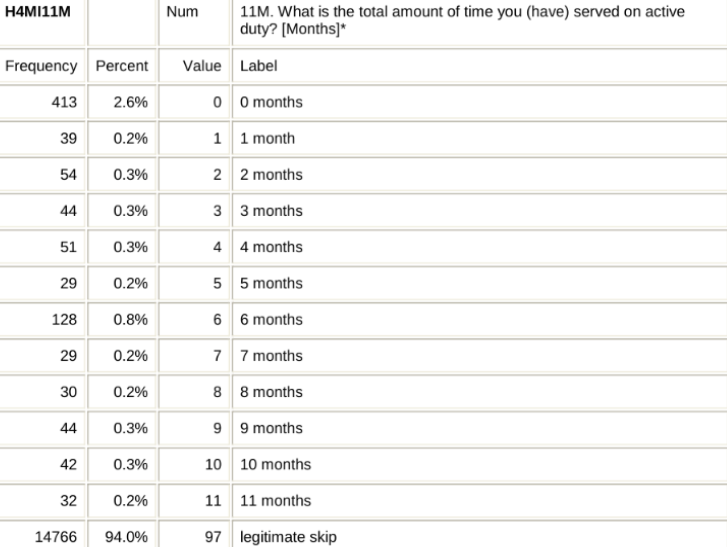

In [115]:
#Manage data for variable 3
df['H4MI11Y'].value_counts()

97    4817
      1390
4       80
2       34
0       34
3       30
1       24
5       21
6       21
8       16
7       12
10       9
9        7
11       5
13       2
12       2
Name: H4MI11Y, dtype: int64

In [116]:
df['active_years'] = df['H4MI11Y']
df['active_years']= pd.to_numeric(df['active_years'],errors= 'coerce')
df['active_years']= df['active_years'].loc[df['active_years'] < 97]
df['active_years']= df['active_years'].loc[df['active_years'] != ' ']
df['active_years'].value_counts()
df['active_years'].max()

13.0

In [120]:
df['H4MI11M'].value_counts()

97    4817
      1390
0      127
6       36
2       23
3       18
4       16
10      15
9       14
5       11
1       11
8       10
11       9
7        7
Name: H4MI11M, dtype: int64

In [118]:
df['active_months']= df['H4MI11M']
df['active_months']= pd.to_numeric(df['active_months'],errors= 'coerce')
df['active_months']= df['active_months'].loc[df['active_months'] < 97]
df['active_months']= df['active_months'].loc[df['active_months'] != ' ']
df['active_months'].value_counts()
df['active_months'].max()

11.0

In [119]:
df['active']=df['active_years']*12+df['active_months']
df['active'].describe()

count    297.000000
mean      51.804714
std       34.342604
min        0.000000
25%       28.000000
50%       48.000000
75%       70.000000
max      156.000000
Name: active, dtype: float64

<Axes: xlabel='active'>

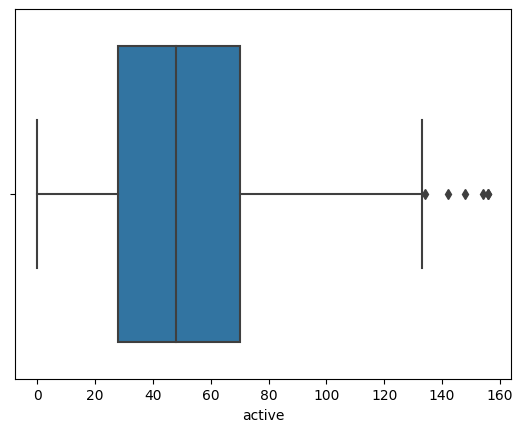

In [121]:
#Graphs and tables or statistics
sns.boxplot(x = 'active', data =df)

<Axes: xlabel='active', ylabel='Percent'>

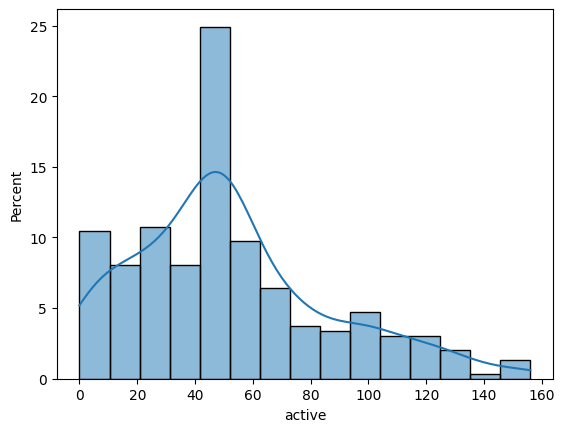

In [122]:
sns.histplot(x = 'active', data =df, stat='percent', bins = 15, kde=True)

**Research Question # 2 : Is there an association between the amount of times a parent physically hurt you before the age of 18 and killing during combat deployment?**

Codebook 1: Before your 18th birthday, how often did a parent or adult caregiver hit you with a fist, kick you, or throw you down on the floor, into a wall, or down stairs?

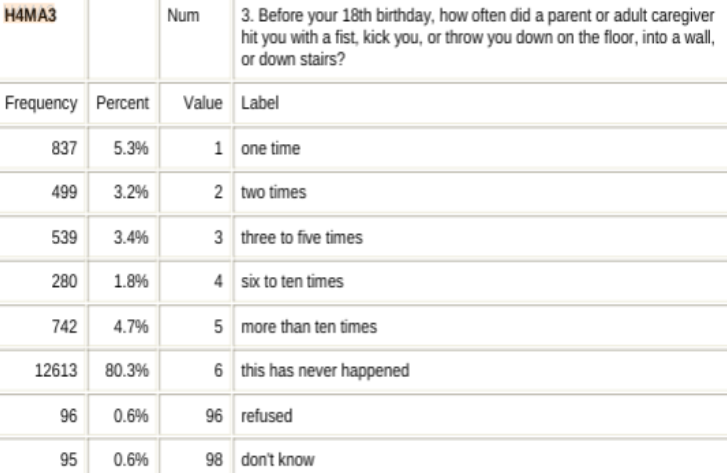

In [124]:
#Manage data for variable 1
df['H4MA3'].value_counts()

6     4171
      1390
1      239
5      223
3      172
2      166
4       80
96      32
98      31
Name: H4MA3, dtype: int64

In [125]:
df['hurt_by_parents'] = df['H4MA3']
df['hurt_by_parents'].value_counts()

6     4171
      1390
1      239
5      223
3      172
2      166
4       80
96      32
98      31
Name: hurt_by_parents, dtype: int64

In [126]:
df['hurt_by_parents'] = df['hurt_by_parents'].loc[ df['hurt_by_parents'] !=' ' ]
df['hurt_by_parents'] = df['hurt_by_parents'].loc[ df['hurt_by_parents'] !='96' ]
df['hurt_by_parents'] = df['hurt_by_parents'].loc[ df['hurt_by_parents'] !='98' ]
df['hurt_by_parents'].replace(['6','1','2','3','4','5'] , ['never_happened','1time','2times','3-5times','6-10times','10+times'], inplace = True)
df['hurt_by_parents'].value_counts()

never_happened    4171
1time              239
10+times           223
3-5times           172
2times             166
6-10times           80
Name: hurt_by_parents, dtype: int64

In [127]:
rp.summary_cat(df['hurt_by_parents'])

,Variable,Outcome,Count,Percent
0,hurt_by_parents,never_happened,4171,82.58
1,,1time,239,4.73
2,,10+times,223,4.41
3,,3-5times,172,3.41
4,,2times,166,3.29
5,,6-10times,80,1.58


<Axes: title={'center': 'Before your 18th birthday, how often did a parent or adult caregiver hit you'}, ylabel='Person Count'>

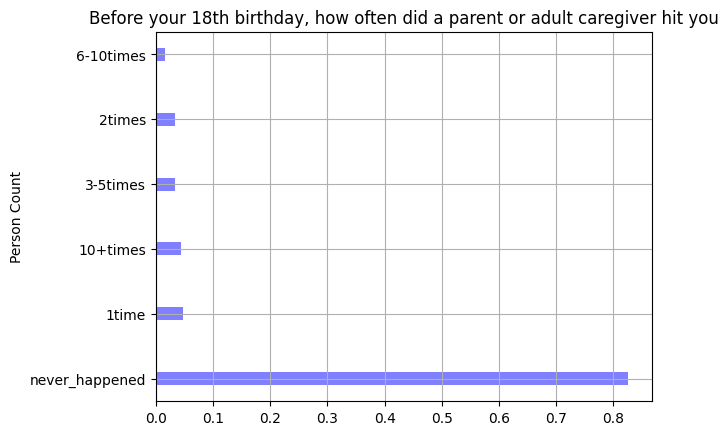

In [137]:
#Graphs and tables or statistics
plt.xlabel("Hurt")
plt.ylabel("Person Count")
plt.title("Before your 18th birthday, how often did a parent or adult caregiver hit you")
df['hurt_by_parents'].value_counts(normalize = True).plot(kind ='barh', color = 'blue', width = 0.2, alpha = 0.5, grid = True)

<Axes: title={'center': 'Before your 18th birthday, how often did a parent or adult caregiver hit you'}, ylabel='hurt_by_parents'>

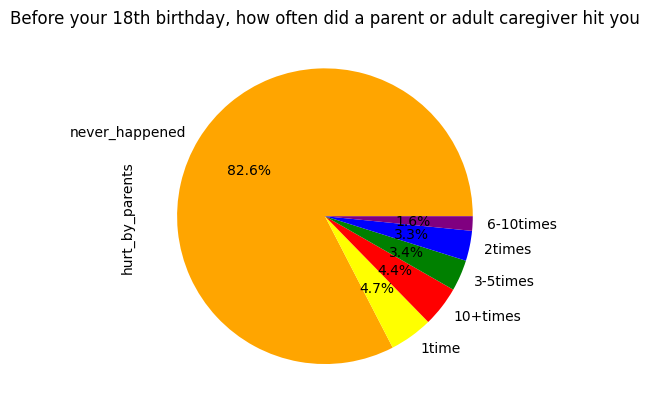

In [136]:
plt.title("Before your 18th birthday, how often did a parent or adult caregiver hit you")
df['hurt_by_parents'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=['orange', 'yellow', 'red', 'green','blue','purple'])

Codebook 2: During your combat deployment, did you ever kill or think you killed someone?

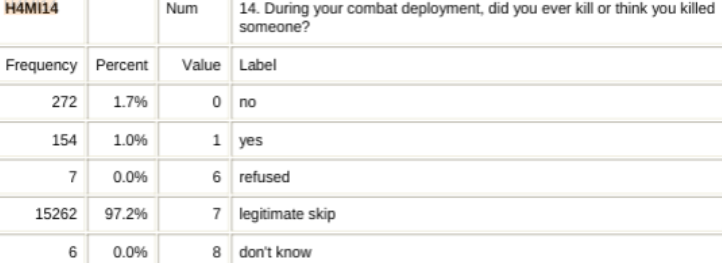

In [128]:
#Manage data for variable 2
df['H4MI14'].value_counts()

7    4982
     1390
0      84
1      45
8       2
6       1
Name: H4MI14, dtype: int64

In [129]:
df['kill_people'] = df['H4MI14']
df['kill_people'].value_counts()

7    4982
     1390
0      84
1      45
8       2
6       1
Name: kill_people, dtype: int64

In [130]:
df['kill_people'] = df['kill_people'].loc[ df['kill_people'] !=' ' ]
df['kill_people'] = df['kill_people'].loc[ df['kill_people'] !='6' ]
df['kill_people'] = df['kill_people'].loc[ df['kill_people'] !='8' ]
df['kill_people'].replace(['0','1','7',] , ['NO','YES','NO'], inplace = True)
df['kill_people'].value_counts()

NO     5066
YES      45
Name: kill_people, dtype: int64

In [131]:
rp.summary_cat(df['kill_people'])

,Variable,Outcome,Count,Percent
0,kill_people,NO,5066,99.12
1,,YES,45,0.88


<Axes: title={'center': 'During your combat deployment, did you ever kill or think you killed someone?'}, ylabel='Person Count'>

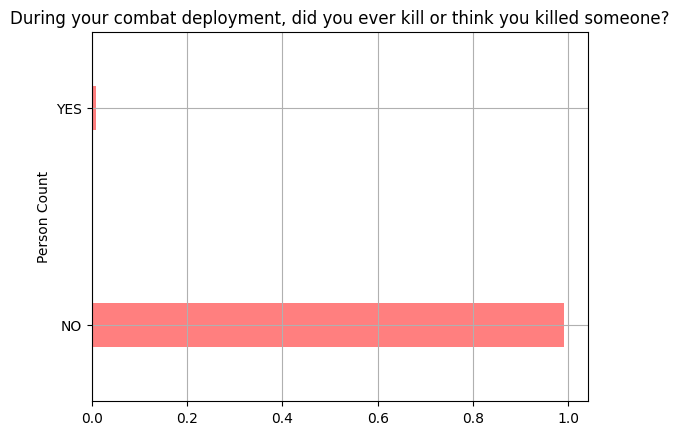

In [132]:
#Graphs and tables or statistics
plt.xlabel("Kill")
plt.ylabel("Person Count")
plt.title("During your combat deployment, did you ever kill or think you killed someone?")
df['kill_people'].value_counts(normalize = True).plot(kind ='barh', color = 'red', width = 0.2, alpha = 0.5, grid = True)

<Axes: title={'center': 'During your combat deployment, did you ever kill or think you killed someone?'}, ylabel='kill_people'>

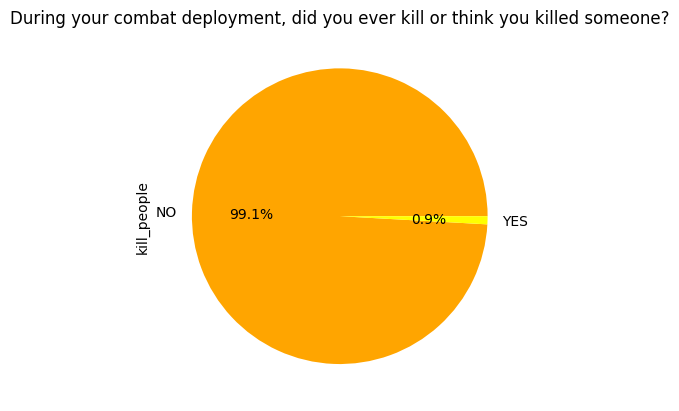

In [134]:
plt.title("During your combat deployment, did you ever kill or think you killed someone?")
df['kill_people'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=['orange', 'yellow', 'red', 'yellow','blue','purple'])